In [ ]:
Use AdvWorksDW
GO

CREATE SCHEMA ext;
GO

## **Virtualizing a Data Lake**

  

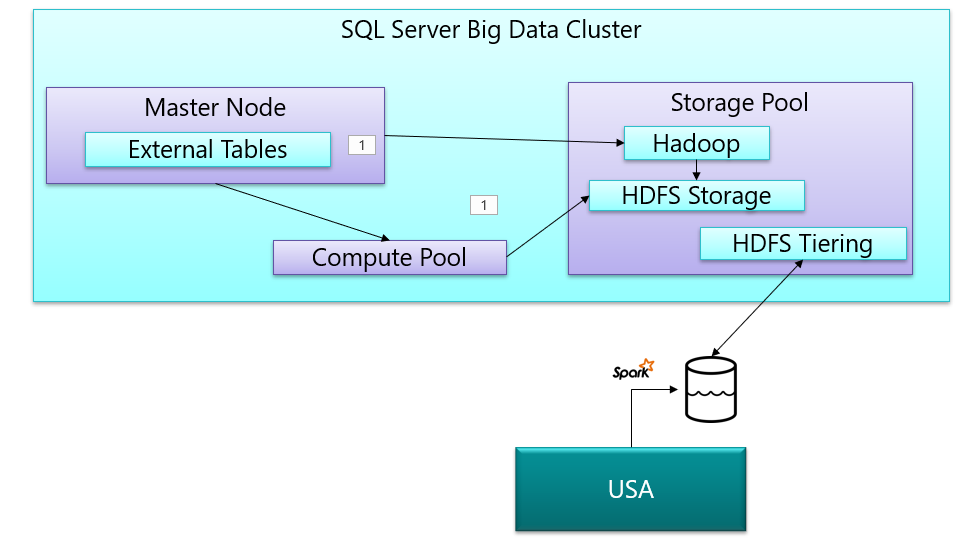

## **Creating Data Sources**

These are two basic data sources needed:

-   **HDFS Storage**: This data source allows SQL Server to query the storage pool directly
    
-   **Hadoop** : This data source allows SQL Server to send a query to Spark to process

In [ ]:
IF NOT EXISTS(SELECT * FROM sys.external_data_sources WHERE name = 'SqlStoragePool')
BEGIN
  CREATE EXTERNAL DATA SOURCE SqlStoragePool
  WITH (LOCATION = 'sqlhdfs://controller-svc/default');
END

 CREATE EXTERNAL DATA SOURCE HadoopData
    WITH(
            TYPE=HADOOP,
            LOCATION='hdfs://nmnode-0-svc:9000/',
            RESOURCE_MANAGER_LOCATION='sparkhead-svc:8032')

## **The mounts should be made now**

abfs://samplecontainer@datalakedemomalta.dfs.core.windows.net/holiday

abfs://samplecontainer@datalakedemomalta.dfs.core.windows.net/weather  

wasbs://2013@nytaxiblob.blob.core.windows.net/Trip2013  

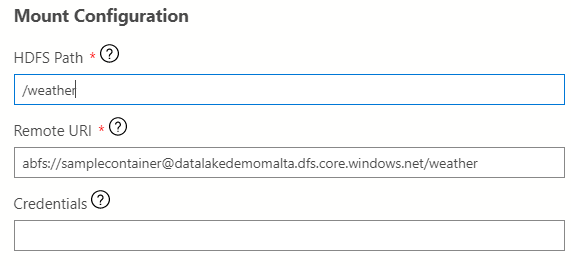

##  **Creating the File Formats**

In [ ]:
CREATE EXTERNAL FILE FORMAT parquetformat  
WITH (  
    FORMAT_TYPE = PARQUET,
    DATA_COMPRESSION = 'org.apache.hadoop.io.compress.SnappyCodec'
);  
go 

CREATE EXTERNAL FILE FORMAT [csvFormat]
    WITH (FORMAT_TYPE = DELIMITEDTEXT, FORMAT_OPTIONS (FIELD_TERMINATOR = N',', STRING_DELIMITER = N'"', FIRST_ROW = 1));
GO

CREATE EXTERNAL FILE FORMAT compressedcsv
WITH ( 
    FORMAT_TYPE = DELIMITEDTEXT,
    FORMAT_OPTIONS ( FIELD_TERMINATOR = '|',
        STRING_DELIMITER = '',
    DATE_FORMAT = '',
        USE_TYPE_DEFAULT = False
    ),
    DATA_COMPRESSION = 'org.apache.hadoop.io.compress.GzipCodec'
);
go

##  **Creating External Table on Storage Pool**

In [ ]:
        CREATE EXTERNAL TABLE [ext].[weather]
        (
            [Usaf] int NOT NULL,
            [Wban] int NOT NULL,
            [Datetime] datetime2 NOT NULL,
            [Latitude] float NOT NULL,
            [Longitude] float NOT NULL,
            [Elevation] float NOT NULL,
            [WindAngle] smallint,
            [WindSpeed] float,
            [Temperature] float,
            [SeaLvPressure] nvarchar(1),
            [CloudCoverage] nvarchar(1),
            [PresentWeatherIndicator] nvarchar(1),
            [PastWeatherIndicator] nvarchar(1),
            [PrecipTime] decimal(3, 1),
            [PrecipDepth] decimal(3, 1),
            [SnowDepth] nvarchar(1),
            [StationName] nvarchar(50) NOT NULL,
            [CountryOrRegion] nvarchar(50) NOT NULL,
            [P_k] nvarchar(50) NOT NULL,
            [Year] smallint NOT NULL,
            [Day] tinyint NOT NULL,
            [Version] float NOT NULL
        )
        WITH (LOCATION = N'/weather', 
            DATA_SOURCE = [SqlStoragePool], 
            FILE_FORMAT = [csvFormat]);

In [25]:
Select top 100 * from ext.weather

(100 rows affected)

Total execution time: 00:00:00.574

Usaf,Wban,Datetime,Latitude,Longitude,Elevation,WindAngle,WindSpeed,Temperature,SeaLvPressure,CloudCoverage,PresentWeatherIndicator,PastWeatherIndicator,PrecipTime,PrecipDepth,SnowDepth,StationName,CountryOrRegion,P_k,Year,Day,Version
999999,63891,2008-05-29 09:45:00.0000000,32.852,-86.612,178,0,0,18.4,NULL,NULL,NULL,NULL,NULL,NULL,NULL,CLANTON 2 NE,US,999999-63891,2008,29,1
999999,63891,2008-05-20 03:50:00.0000000,32.852,-86.612,178,210,2.2,20.4,NULL,NULL,NULL,NULL,NULL,NULL,NULL,CLANTON 2 NE,US,999999-63891,2008,20,1
999999,63868,2008-05-03 05:50:00.0000000,34.66,-87.346,175,180,7.1,21.4,NULL,NULL,NULL,NULL,NULL,NULL,NULL,COURTLAND 2 WSW,US,999999-63868,2008,3,1
999999,63868,2008-05-25 18:10:00.0000000,34.66,-87.346,175,339,0.9,28.6,NULL,NULL,NULL,NULL,NULL,NULL,NULL,COURTLAND 2 WSW,US,999999-63868,2008,25,1
999999,63867,2008-05-03 09:50:00.0000000,34.195,-86.796,244,183,3.2,18.7,NULL,NULL,NULL,NULL,NULL,NULL,NULL,CULLMAN 3 ENE,US,999999-63867,2008,3,1
999999,63868,2008-05-01 13:45:00.0000000,34.66,-87.346,175,183,4.2,17.6,NULL,NULL,NULL,NULL,NULL,NULL,NULL,COURTLAND 2 WSW,US,999999-63868,2008,1,1
999999,63867,2008-05-10 21:35:00.0000000,34.195,-86.796,244,48,0.7,25.3,NULL,NULL,NULL,NULL,NULL,NULL,NULL,CULLMAN 3 ENE,US,999999-63867,2008,10,1
999999,63867,2008-05-17 05:00:00.0000000,34.195,-86.796,244,35,0.5,8.5,NULL,NULL,NULL,NULL,1.0,0.0,NULL,CULLMAN 3 ENE,US,999999-63867,2008,17,1
999999,63868,2008-05-17 02:50:00.0000000,34.66,-87.346,175,343,1.6,14,NULL,NULL,NULL,NULL,NULL,NULL,NULL,COURTLAND 2 WSW,US,999999-63868,2008,17,1
999999,63891,2008-05-04 09:05:00.0000000,32.852,-86.612,178,358,2,13.9,NULL,NULL,NULL,NULL,NULL,NULL,NULL,CLANTON 2 NE,US,999999-63891,2008,4,1


## **Internal Details**

When executing a query directly on the storage, the master delegates the execution to the compute pool

It's interesting to notice how the distribution involves the HEAD and COMPUTE nodes in the compute pool, in some levels ignoring HEAD and COMPUTE are the same on the current configuration and the number of existing COMPUTE nodes.

In [26]:
select top 8 execution_id, status, start_time,end_time,
            compute_pool_id, text,dbid 
 from sys.dm_exec_distributed_requests
cross apply sys.dm_exec_sql_text(sql_handle) st
order by start_time desc

(8 rows affected)

Total execution time: 00:00:00.558

execution_id,status,start_time,end_time,compute_pool_id,text,dbid
QID769,Running,2020-11-05 23:14:09.670,NULL,1,"CREATE FUNCTION sys.fn_polybase_distributed_requests_per_pool(@poolId int) RETURNS @distributed_requests TABLE ( sql_handle varbinary(64), execution_id nvarchar(32), status nvarchar(32), error_id nvarchar(36), start_time datetime, end_time datetime, total_elapsed_time int ) AS BEGIN if @poolId = 0 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile) ELSE IF @poolId = 1 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile, force scaleoutexecution) RETURN END",32767
QID963,Running,2020-11-05 23:14:09.367,NULL,0,"CREATE FUNCTION sys.fn_polybase_distributed_requests_per_pool(@poolId int) RETURNS @distributed_requests TABLE ( sql_handle varbinary(64), execution_id nvarchar(32), status nvarchar(32), error_id nvarchar(36), start_time datetime, end_time datetime, total_elapsed_time int ) AS BEGIN if @poolId = 0 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile) ELSE IF @poolId = 1 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile, force scaleoutexecution) RETURN END",32767
QID766,Completed,2020-11-05 23:03:35.963,2020-11-05 23:03:36.443,1,Select top 100 * from ext.weather,NULL
QID764,Completed,2020-11-04 22:20:17.137,2020-11-04 22:20:18.243,1,"WITH daily_sales AS ( select orderdate,count(*) as total from FactInternetSales where year(orderdate)=2013 group by orderdate ), public_holidays AS ( SELECT holidayname as holiday, date FROM ext.holidays WHERE countryorregion = 'United States' AND YEAR(date) = 2013 ) SELECT [orderdate], case when holiday is null then 0 else total end holiday,total FROM daily_sales s LEFT OUTER JOIN public_holidays p on s.orderdate = p.date ORDER BY orderdate ASC;",NULL
QID958,Completed,2020-11-04 22:18:25.127,2020-11-04 22:18:25.457,0,"select orderdate,count(*) as total from FactInternetSales where year(orderdate)=2013 group by orderdate",NULL
QID955,Completed,2020-11-04 22:17:41.670,2020-11-04 22:17:42.147,0,"select year(orderdate) Year, count(*) as total from FactInternetSales group by year(orderdate)",NULL
QID952,Completed,2020-11-04 21:59:09.457,2020-11-04 22:10:30.397,0,"select passengercount,count(*) as total from ext.Trip group by passengercount",NULL
QID950,Failed,2020-11-04 21:40:24.803,2020-11-04 21:43:25.880,0,"select passengercount,count(*) as total from ext.Trip group by passengercount",NULL


In [27]:
select execution_id,step_index, operation_type,
        distribution_type, location_type,
        row_count,command,
        compute_pool_id, status
 from sys.dm_exec_distributed_request_steps
where execution_id='QID766'
order by step_index

(17 rows affected)

Total execution time: 00:00:00.513

execution_id,step_index,operation_type,distribution_type,location_type,row_count,command,compute_pool_id,status
QID766,0,RandomIDOperation,Unspecified,Head,-1,TEMP_ID_101,1,Complete
QID766,0,RandomIDOperation,Unspecified,Head,-1,TEMP_ID_59,0,Complete
QID766,1,OnOperation,Unspecified,Head,-1,"CREATE TABLE [tempdb].[dbo].[TEMP_ID_59] ([execution_id] NVARCHAR(32) COLLATE Latin1_General_CI_AI, [step_index] INT, [dms_step_index] INT, [compute_node_id] INT, [distribution_id] INT, [type] NVARCHAR(32) COLLATE Latin1_General_CI_AI, [status] NVARCHAR(32) COLLATE Latin1_General_CI_AI, [bytes_per_sec] BIGINT, [bytes_processed] BIGINT, [rows_processed] BIGINT, [start_time] DATETIME, [end_time] DATETIME, [total_elapsed_time] INT, [cpu_time] BIGINT, [query_time] INT, [buffers_available] INT, [dms_cpid] INT, [sql_spid] INT, [error_id] NVARCHAR(36) COLLATE Latin1_General_CI_AI, [source_info] NVARCHAR(4000) COLLATE Latin1_General_CI_AI, [destination_info] NVARCHAR(4000) COLLATE Latin1_General_CI_AI, [command] NVARCHAR(4000) COLLATE Latin1_General_CI_AI );",0,Complete
QID766,1,OnOperation,AllDistributions,Compute,-1,"CREATE TABLE [tempdb].[dbo].[TEMP_ID_101] ([Usaf] INT NOT NULL, [Wban] INT NOT NULL, [Datetime] DATETIME2(7) NOT NULL, [Latitude] FLOAT(53) NOT NULL, [Longitude] FLOAT(53) NOT NULL, [Elevation] FLOAT(53) NOT NULL, [WindAngle] SMALLINT, [WindSpeed] FLOAT(53), [Temperature] FLOAT(53), [SeaLvPressure] NVARCHAR(1) COLLATE SQL_Latin1_General_CP1_CI_AS, [CloudCoverage] NVARCHAR(1) COLLATE SQL_Latin1_General_CP1_CI_AS, [PresentWeatherIndicator] NVARCHAR(1) COLLATE SQL_Latin1_General_CP1_CI_AS, [PastWeatherIndicator] NVARCHAR(1) COLLATE SQL_Latin1_General_CP1_CI_AS, [PrecipTime] DECIMAL(3, 1), [PrecipDepth] DECIMAL(3, 1), [SnowDepth] NVARCHAR(1) COLLATE SQL_Latin1_General_CP1_CI_AS, [StationName] NVARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS NOT NULL, [CountryOrRegion] NVARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS NOT NULL, [P_k] NVARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS NOT NULL, [Year] SMALLINT NOT NULL, [Day] TINYINT NOT NULL, [Version] FLOAT(53) NOT NULL ) WITH(DATA_COMPRESSION=PAGE);",1,Complete
QID766,2,OnOperation,AllDistributions,Compute,-1,"EXEC [tempdb].[sys].[sp_addextendedproperty] @name=N'IS_EXTERNAL_STREAMING_TABLE', @value=N'true', @level0type=N'SCHEMA', @level0name=N'dbo', @level1type=N'TABLE', @level1name=N'TEMP_ID_101'",1,Complete
QID766,2,MetaDataCreateOperation,Unspecified,Head,-1,NULL,0,Complete
QID766,3,StreamingReturnOperation,Unspecified,DMS,514,"SELECT [T1_1].[step_index] AS [step_index], [T1_1].[dms_step_index] AS [dms_step_index], [T1_1].[compute_node_id] AS [compute_node_id], [T1_1].[distribution_id] AS [distribution_id], [T1_1].[bytes_per_sec] AS [bytes_per_sec], [T1_1].[bytes_processed] AS [bytes_processed], [T1_1].[rows_processed] AS [rows_processed], [T1_1].[start_time] AS [start_time], [T1_1].[end_time] AS [end_time], [T1_1].[total_elapsed_time] AS [total_elapsed_time], [T1_1].[cpu_time] AS [cpu_time], [T1_1].[query_time] AS [query_time], [T1_1].[buffers_available] AS [buffers_available], [T1_1].[dms_cpid] AS [dms_cpid], [T1_1].[sql_spid] AS [sql_spid], [T1_1].[col] AS [col], [T1_1].[col1] AS [col1], [T1_1].[col2] AS [col2], [T1_1].[col3] AS [col3], [T1_1].[col4] AS [col4], [T1_1].[col5] AS [col5], [T1_1].[col6] AS [col6] FROM (SELECT CONVERT (NVARCHAR (32), CONVERT (NVARCHAR (32), [T2_1].[execution_id], 0) COLLATE SQL_Latin1_General_CP1_CI_AS, 0) COLLATE Latin1_General_CI_AI AS [col], CONVERT (NVARCHAR (32), CONVERT (NVARCHAR (32), [T2_1].[type], 0) COLLATE SQL_Latin1_General_CP1_CI_AS, 0) COLLATE Latin1_General_CI_AI AS [col1], CONVERT (NVARCHAR (32), CONVERT (NVARCHAR (32), [T2_1].[status], 0) COLLATE SQL_Latin1_General_CP1_CI_AS, 0) COLLATE Latin1_General_CI_AI AS [col2], CONVERT (NVARCHAR (36), CONVERT (NVARCHAR (36), [T2_1].[error_id], 0) COLLATE SQL_Latin1_General_CP1_CI_AS, 0) COLLATE Latin1_General_CI_AI AS [col3], CONVERT (NVARCHAR (4000), CONVERT (NVARCHAR (4000), [T2_1].[source_in

In [28]:
select execution_id, step_index,dms_step_index,
         [type], compute_pool_id,
        [status],rows_processed,source_info,destination_info
from sys.dm_exec_dms_workers
where execution_id='QID766' and step_index=7
order by dms_step_index

(16 rows affected)

Total execution time: 00:00:01.111

execution_id,step_index,dms_step_index,type,compute_pool_id,status,rows_processed,source_info,destination_info
QID766,7,0,EXTERNAL_READER,1,StepComplete,0,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,1,EXTERNAL_READER,1,StepComplete,0,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,2,EXTERNAL_READER,1,StepComplete,100,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,3,EXTERNAL_READER,1,StepComplete,0,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,4,EXTERNAL_READER,1,StepComplete,0,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,5,EXTERNAL_READER,1,StepComplete,0,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,6,EXTERNAL_READER,1,StepComplete,0,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,7,EXTERNAL_READER,1,StepComplete,0,sqlhdfs://controller-svc/default/weather,NULL
QID766,7,8,WRITER,1,StepComplete,40,NULL,QTable_9c14ec6d1ba541568538ac68d11db019_A
QID766,7,9,WRITER,1,StepComplete,0,NULL,QTable_9c14ec6d1ba541568538ac68d11db019_B


##  **Create External Table over Hadoop**

In [29]:

CREATE EXTERNAL TABLE [ext].[Trip]
(
    [DateID] int,
    [MedallionID] int,
    [HackneyLicenseID] int,
    [PickupTimeID] int,
    [DropoffTimeID] int,
    [PickupGeographyID] int,
    [DropoffGeographyID] int,
    [PickupLatitude] float,
    [PickupLongitude] float,
    [PickupLatLong] varchar(50) COLLATE SQL_Latin1_General_CP1_CI_AS,
    [DropoffLatitude] float,
    [DropoffLongitude] float,
    [DropoffLatLong] varchar(50) COLLATE SQL_Latin1_General_CP1_CI_AS,
    [PassengerCount] int,
    [TripDurationSeconds] int,
    [TripDistanceMiles] float,
    [PaymentType] varchar(50) COLLATE SQL_Latin1_General_CP1_CI_AS,
    [FareAmount] money,
    [SurchargeAmount] money,
    [TaxAmount] money,
    [TipAmount] money,
    [TollsAmount] money,
    [TotalAmount] money
)
WITH
(
    LOCATION = 'NYTaxi',
    DATA_SOURCE = HadoopData,
    FILE_FORMAT = compressedcsv
);


Commands completed successfully.

Total execution time: 00:00:00.664

In [31]:
select top 100 * from [ext].trip

(100 rows affected)

Total execution time: 00:00:05.568

DateID,MedallionID,HackneyLicenseID,PickupTimeID,DropoffTimeID,PickupGeographyID,DropoffGeographyID,PickupLatitude,PickupLongitude,PickupLatLong,DropoffLatitude,DropoffLongitude,DropoffLatLong,PassengerCount,TripDurationSeconds,TripDistanceMiles,PaymentType,FareAmount,SurchargeAmount,TaxAmount,TipAmount,TollsAmount,TotalAmount
20130401,8549,21414,25803,26047,137892,158034,40.8091,-73.9404,"40.8091,-73.9404",40.8195,-73.9444,"40.8195,-73.9444",1,244,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130201,9997,12657,25460,25742,151209,245819,40.7625,-73.9658,"40.7625,-73.9658",40.767,-73.9542,"40.767,-73.9542",1,282,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20131214,9920,11188,27149,27378,123643,13395,40.7435,-73.9843,"40.7435,-73.9843",40.756,-73.9755,"40.756,-73.9755",1,229,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130313,6146,3434,50101,50333,101804,203287,40.7645,-73.9325,"40.7645,-73.9325",40.7556,-73.9453,"40.7556,-73.9453",1,231,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130723,11340,23310,24969,25251,438,267602,40.7565,-73.9918,"40.7565,-73.9918",40.7624,-73.9795,"40.7624,-73.9795",1,281,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130816,4419,21743,53012,53352,217944,141190,40.7563,-73.9977,"40.7563,-73.9977",40.7628,-73.9871,"40.7628,-73.9871",1,340,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130504,5800,28083,44460,44746,156368,264265,40.7719,-73.9632,"40.7719,-73.9632",40.7795,-73.9514,"40.7795,-73.9514",1,285,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130622,8611,7890,36750,36992,240598,234782,40.7564,-73.9941,"40.7564,-73.9941",40.7455,-73.9944,"40.7455,-73.9944",1,241,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130318,8716,40726,23232,23481,196775,258201,40.7262,-74.0039,"40.7262,-74.0039",40.7141,-74.0103,"40.7141,-74.0103",1,249,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000
20130505,5113,28217,65599,65837,5101,217133,40.8344,-73.9448,"40.8344,-73.9448",40.8216,-73.9542,"40.8216,-73.9542",1,238,1,CSH,5.5000,0.0000,0.5000,0.0000,0.0000,6.0000


## **Internal Details**

The request steps in this execution is very similar to the previous one, with a single difference: It's not using  the compute pool, because the target is the hadoop cluster. The compute pool appears as 0. All the steps for compute and head are still executed, but there will always be a single compute node.

In [32]:
select top 8 execution_id, status, start_time,end_time,
            compute_pool_id, text,dbid 
 from sys.dm_exec_distributed_requests
cross apply sys.dm_exec_sql_text(sql_handle) st
order by start_time desc

(8 rows affected)

Total execution time: 00:00:00.411

execution_id,status,start_time,end_time,compute_pool_id,text,dbid
QID778,Running,2020-11-05 23:18:10.273,NULL,1,"CREATE FUNCTION sys.fn_polybase_distributed_requests_per_pool(@poolId int) RETURNS @distributed_requests TABLE ( sql_handle varbinary(64), execution_id nvarchar(32), status nvarchar(32), error_id nvarchar(36), start_time datetime, end_time datetime, total_elapsed_time int ) AS BEGIN if @poolId = 0 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile) ELSE IF @poolId = 1 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile, force scaleoutexecution) RETURN END",32767
QID980,Running,2020-11-05 23:18:10.043,NULL,0,"CREATE FUNCTION sys.fn_polybase_distributed_requests_per_pool(@poolId int) RETURNS @distributed_requests TABLE ( sql_handle varbinary(64), execution_id nvarchar(32), status nvarchar(32), error_id nvarchar(36), start_time datetime, end_time datetime, total_elapsed_time int ) AS BEGIN if @poolId = 0 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile) ELSE IF @poolId = 1 INSERT INTO @distributed_requests SELECT sql_handle, execution_id collate database_default execution_id, status collate database_default status, error_id, start_time, end_time, total_elapsed_time FROM sys._dm_exec_distributed_requests option(recompile, force scaleoutexecution) RETURN END",32767
QID977,Completed,2020-11-05 23:17:40.850,2020-11-05 23:17:45.747,0,select top 100 * from [ext].trip,NULL
QID975,Failed,2020-11-05 23:17:16.350,2020-11-05 23:17:20.477,0,select top 100 * from [ext].trip,NULL
QID775,Completed,2020-11-05 23:15:53.613,2020-11-05 23:15:53.963,1,"CREATE FUNCTION sys.fn_polybase_dms_workers_per_pool(@poolId int) RETURNS @dms_workers TABLE ( execution_id nvarchar(32), step_index int, dms_step_index int, compute_node_id int, distribution_id int, type nvarchar(32), status nvarchar(32), bytes_per_sec bigint, bytes_processed bigint, rows_processed bigint, start_time datetime, end_time datetime, total_elapsed_time int, cpu_time bigint, query_time int, buffers_available int, dms_cpid int, sql_spid int, error_id nvarchar(36), source_info nvarchar(4000), destination_info nvarchar(4000), command nvarchar(4000) ) AS BEGIN if @poolId = 0 INSERT INTO @dms_workers SELECT execution_id collate database_default execution_id, step_index, dms_step_index, compute_node_id, distribution_id, type collate database_default type, status collate database_default status, bytes_per_sec, bytes_processed, rows_processed, start_time, end_time, total_elapsed_time, cpu_time, query_time, buffers_available, dms_cpid, sql_spid, error_id collate database_default error_id, source_info collate database_default source_info, destination_info collate database_default destination_info, command collate database_default command FROM sys._dm_exec_dms_workers option(recompile) ELSE IF @poolId = 1 INSERT INTO @dms_workers SELECT execution_id collate database_default execution_id, step_index, dms_step_index, compute_node_id, distribution_id, type collate database_default type, status collate database_default status, bytes_per_sec, bytes_processed, rows_processed, start_time, end_time, total_elapsed_time, cpu_time, query_time, buffers_available, dms_cpid, sql_spid, error_id collate database_default error_id, source_info collate database_default source_info, destination_info collate database_default destination_info, command collate database_default command FROM sys._dm_exec_dms_workers optio

In [33]:
select execution_id,step_index, operation_type,
        distribution_type, location_type,
        row_count,command,
        compute_pool_id, status
 from sys.dm_exec_distributed_request_steps
where execution_id='QID977'
order by step_index

(12 rows affected)

Total execution time: 00:00:00.549

execution_id,step_index,operation_type,distribution_type,location_type,row_count,command,compute_pool_id,status
QID977,0,RandomIDOperation,Unspecified,Head,-1,TEMP_ID_110,0,Complete
QID977,1,OnOperation,AllDistributions,Compute,-1,"CREATE TABLE [tempdb].[dbo].[TEMP_ID_110] ([DateID] INT, [MedallionID] INT, [HackneyLicenseID] INT, [PickupTimeID] INT, [DropoffTimeID] INT, [PickupGeographyID] INT, [DropoffGeographyID] INT, [PickupLatitude] FLOAT(53), [PickupLongitude] FLOAT(53), [PickupLatLong] VARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS, [DropoffLatitude] FLOAT(53), [DropoffLongitude] FLOAT(53), [DropoffLatLong] VARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS, [PassengerCount] INT, [TripDurationSeconds] INT, [TripDistanceMiles] FLOAT(53), [PaymentType] VARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS, [FareAmount] MONEY, [SurchargeAmount] MONEY, [TaxAmount] MONEY, [TipAmount] MONEY, [TollsAmount] MONEY, [TotalAmount] MONEY ) WITH(DATA_COMPRESSION=PAGE);",0,Complete
QID977,2,OnOperation,AllDistributions,Compute,-1,"EXEC [tempdb].[sys].[sp_addextendedproperty] @name=N'IS_EXTERNAL_STREAMING_TABLE', @value=N'true', @level0type=N'SCHEMA', @level0name=N'dbo', @level1type=N'TABLE', @level1name=N'TEMP_ID_110'",0,Complete
QID977,3,OnOperation,AllDistributions,Compute,-1,"UPDATE STATISTICS [tempdb].[dbo].[TEMP_ID_110] WITH ROWCOUNT = 4223388, PAGECOUNT = 141260",0,Complete
QID977,4,RandomIDOperation,Unspecified,Head,-1,TEMP_ID_111,0,Complete
QID977,5,OnOperation,Unspecified,Head,-1,"CREATE TABLE [tempdb].[dbo].[TEMP_ID_111] ([DateID] INT, [MedallionID] INT, [HackneyLicenseID] INT, [PickupTimeID] INT, [DropoffTimeID] INT, [PickupGeographyID] INT, [DropoffGeographyID] INT, [PickupLatitude] FLOAT(53), [PickupLongitude] FLOAT(53), [PickupLatLong] VARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS, [DropoffLatitude] FLOAT(53), [DropoffLongitude] FLOAT(53), [DropoffLatLong] VARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS, [PassengerCount] INT, [TripDurationSeconds] INT, [TripDistanceMiles] FLOAT(53), [PaymentType] VARCHAR(50) COLLATE SQL_Latin1_General_CP1_CI_AS, [FareAmount] MONEY, [SurchargeAmount] MONEY, [TaxAmount] MONEY, [TipAmount] MONEY, [TollsAmount] MONEY, [TotalAmount] MONEY ) WITH(DATA_COMPRESSION=PAGE);",0,Complete
QID977,6,MultiStreamOperation,Unspecified,Head,-1,NULL,0,Complete
QID977,7,HadoopRoundRobinOperation,Unspecified,DMS,5751,"SELECT [T1_1].[DateID] AS [DateID], [T1_1].[MedallionID] AS [MedallionID], [T1_1].[HackneyLicenseID] AS [HackneyLicenseID], [T1_1].[PickupTimeID] AS [PickupTimeID], [T1_1].[DropoffTimeID] AS [DropoffTimeID], [T1_1].[PickupGeographyID] AS [PickupGeographyID], [T1_1].[DropoffGeographyID] AS [DropoffGeographyID], [T1_1].[PickupLatitude] AS [PickupLatitude], [T1_1].[PickupLongitude] AS [PickupLongitude], [T1_1].[PickupLatLong] AS [PickupLatLong], [T1_1].[DropoffLatitude] AS [DropoffLatitude], [T1_1].[DropoffLongitude] AS [DropoffLongitude], [T1_1].[DropoffLatLong] AS [DropoffLatLong], [T1_1].[PassengerCount] AS [PassengerCount], [T1_1].[TripDurationSeconds] AS [TripDurationSeconds], [T1_1].[TripDistanceMiles] AS [TripDistanceMiles], [T1_1].[PaymentType] AS [PaymentType], [T1_1].[FareAmount] AS [FareAmount], [T1_1].[SurchargeAmount] AS [SurchargeAmount], [T1_1].[TaxAmount] AS [TaxAmount], [T1_1].[TipAmount] AS [TipAmount], [T1_1].[TollsAmount] AS [TollsAmount], [T1_1].[TotalAmount] AS [TotalAmount] FROM [AdvWorksDW].[ext].[Trip] AS T1_1",0,Complete
QID977,8,PartitionMoveOperation,Unspecified,DMS,800,"SELECT [T1_1].[DateID] AS [DateID], [T1_1].[MedallionID] AS [MedallionID], [T1_1].[HackneyLicenseID] AS [HackneyLicenseID], [T1_1].[PickupTimeID] AS [PickupTimeID], [T1_1].[DropoffTimeID] AS [DropoffTimeID], [T1_1].[PickupGeographyID] AS [PickupGeographyID], [T1_1].[DropoffGeographyID] AS [DropoffGeographyID], [T1_1].[PickupLatitude] AS [PickupLatitude], [T1_1].[PickupLongitude] AS [PickupLongitude], [T1_1].[PickupLatLong] AS [PickupLatLong], [T1_1].[DropoffLatitude] AS [DropoffLatitude], [T1_1].[DropoffL

In [34]:
select execution_id, step_index,dms_step_index,
         [type], compute_pool_id,
        [status],rows_processed,source_info,destination_info
from sys.dm_exec_dms_workers
where execution_id='QID977' and step_index=7
order by dms_step_index



(24 rows affected)

Total execution time: 00:00:01.096

execution_id,step_index,dms_step_index,type,compute_pool_id,status,rows_processed,source_info,destination_info
QID977,7,0,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,1,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,2,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,3,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,4,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,5,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,6,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,7,EXTERNAL_READER,0,StepCancelled,0,hdfs://nmnode-0-svc:9000/NYTaxi,NULL
QID977,7,8,ROUNDROBIN_CONVERTER,0,StepCancelled,71,NULL,NULL
QID977,7,9,ROUNDROBIN_CONVERTER,0,StepCancelled,71,NULL,NULL


**Why the Hadoop operation was cancelled ?**

It was identified there was only the need to read a single partition, so it reverted to another reading method

_The Parallel\_Copy\_Reader you see below doesn't generate steps as external work_

In [35]:
select execution_id, step_index,dms_step_index,
         [type], compute_pool_id,
        [status],rows_processed,source_info,destination_info
from sys.dm_exec_dms_workers
where execution_id='QID925' and step_index=8
order by dms_step_index

(8 rows affected)

Total execution time: 00:00:00.997

execution_id,step_index,dms_step_index,type,compute_pool_id,status,rows_processed,source_info,destination_info
QID925,8,0,PARALLEL_COPY_READER,0,StepComplete,100,"SELECT [T1_1].[DateID] AS [DateID], [T1_1].[MedallionID] AS [MedallionID], [T1_1].[HackneyLicenseID] AS [HackneyLicenseID], [T1_1].[PickupTimeID] AS [PickupTimeID], [T1_1].[DropoffTimeID] AS [DropoffTimeID], [T1_1].[PickupGeographyID] AS [PickupGeographyID], [T1_1].[DropoffGeographyID] AS [DropoffGeographyID], [T1_1].[PickupLatitude] AS [PickupLatitude], [T1_1].[PickupLongitude] AS [PickupLongitude], [T1_1].[PickupLatLong] AS [PickupLatLong], [T1_1].[DropoffLatitude] AS [DropoffLatitude], [T1_1].[DropoffLongitude] AS [DropoffLongitude], [T1_1].[DropoffLatLong] AS [DropoffLatLong], [T1_1].[PassengerCount] AS [PassengerCount], [T1_1].[TripDurationSeconds] AS [TripDurationSeconds], [T1_1].[TripDistanceMiles] AS [TripDistanceMiles], [T1_1].[PaymentType] AS [PaymentType], [T1_1].[FareAmount] AS [FareAmount], [T1_1].[SurchargeAmount] AS [SurchargeAmount], [T1_1].[TaxAmount] AS [TaxAmount], [T1_1].[TipAmount] AS [TipAmount], [T1_1].[TollsAmount] AS [TollsAmount], [T1_1].[TotalAmount] AS [TotalAmount] FROM (SELECT TOP (CAST ((100) AS BIGINT)) [T2_1].[DateID] AS [DateID], [T2_1].[MedallionID] AS [MedallionID], [T2_1].[HackneyLicenseID] AS [HackneyLicenseID], [T2_1].[PickupTimeID] AS [PickupTimeID], [T2_1].[DropoffTimeID] AS [DropoffTimeID], [T2_1].[PickupGeographyID] AS [PickupGeographyID], [T2_1].[DropoffGeographyID] AS [DropoffGeographyID], [T2_1].[PickupLatitude] AS [PickupLatitude], [T2_1].[PickupLongitude] AS [PickupLongitude], [T2_1].[PickupLatLong] AS [PickupLatLong], [T2_1].[DropoffLatitude] AS [DropoffLatitude], [T2_1].[DropoffLongitude] AS [DropoffLongitude], [T2_1].[DropoffLatLong] AS [DropoffLatLong], [T2_1].[PassengerCount] AS [PassengerCount], [T2_1].[TripDurationSeconds] AS [TripDurationSeconds], [T2_1].[TripDistanceMiles] AS [TripDistanceMiles], [T2_1].[PaymentType] AS [PaymentType], [T2_1].[FareAmount] AS [FareAmount], [T2_1].[SurchargeAmount] AS [SurchargeAmount], [T2_1].[TaxAmount] AS [TaxAmount], [T2_1].[TipAmount] AS [TipAmount], [T2_1].[TollsAmount] AS [TollsAmount], [T2_1].[TotalAmount] AS [TotalAmount] FROM [tempdb].[dbo].[QTable_dda3756020524f1989773fcb05f0b723_A] AS T2_1) AS T1_1",[tempdb].[dbo].[QTable_ef73e258e0814322980d1eec82fde84e]
QID925,8,1,PARALLEL_COPY_READER,0,StepComplete,100,"SELECT [T1_1].[DateID] AS [DateID], [T1_1].[MedallionID] AS [MedallionID], [T1_1].[HackneyLicenseID] AS [HackneyLicenseID], [T1_1].[PickupTimeID] AS [PickupTimeID], [T1_1].[DropoffTimeID] AS [DropoffTimeID], [T1_1].[PickupGeographyID] AS [PickupGeographyID], [T1_1].[DropoffGeographyID] AS [DropoffGeographyID], [T1_1].[PickupLatitude] AS [PickupLatitude], [T1_1].[PickupLongitude] AS [PickupLongitude], [T1_1].[PickupLatLong] AS [PickupLatLong], [T1_1].[DropoffLatitude] AS [DropoffLatitude], [T1_1].[DropoffLongitude] AS [DropoffLongitude], [T1_1].[DropoffLatLong] AS [DropoffLatLong], [T1_1].[PassengerCount] AS [PassengerCount], [T1_1].[TripDurationSeconds] AS [TripDurationSeconds], [T1_1].[TripDistanceMiles] AS [TripDistanceMiles], [T1_1].[PaymentType] AS [PaymentType], [T1_1].[FareAmount] AS [FareAmount], [T1_1].[SurchargeAmount] AS [SurchargeAmount], [T1_1].[TaxAmount] AS [TaxAmount], [T1_1].[TipAmount] AS [TipAmount], [T1_1].[TollsAmount] AS [TollsAmount], [T1_1].[TotalAmount] AS [TotalAmount] FROM (SELECT TOP (CAST ((100) AS BIGINT)) [T2_1].[DateID] AS [DateID], [T2_1].[MedallionID] AS [MedallionID], [T2_1].[HackneyLicenseID] AS [HackneyLicenseID], [T2_1].[PickupTimeID] AS [PickupTimeID], [T2_1].[DropoffTimeID] AS [DropoffTimeID], [T2_1].[PickupGeographyID] AS [PickupGeographyID], [T2_1].[DropoffGeographyID] AS [DropoffGeographyID], [T2_1].[PickupLatitude] AS [PickupLatitude], [T2_1].[PickupLongitude] AS [PickupLongitude], [T2_1].[PickupLatLong] AS [PickupLatLong], [T2_1].[DropoffLatitude] AS [DropoffLatitude], [T2_1].[DropoffLongitude] AS [DropoffLongitude], [T2_1]

## **Creating the 3rd External Table**

In [36]:
CREATE EXTERNAL TABLE ext.holidays (
	[countryOrRegion] varchar(8000),
	[holidayName] varchar(8000),
	[normalizeHolidayName] varchar(8000),
	[isPaidTimeOff] bit,
	[countryRegionCode] varchar(8000),
	[date] datetime2(7)
	)
	WITH (
	LOCATION = 'holidays',
	DATA_SOURCE = SqlStoragePool,
	FILE_FORMAT = parquetformat
	)
GO

Commands completed successfully.

Total execution time: 00:00:00.090

In [37]:
select top 100 * from ext.holidays

(100 rows affected)

Total execution time: 00:00:00.770

countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
Belgium,Nieuwjaarsdag,Nieuwjaarsdag,NULL,BE,1970-01-01 00:00:00.0000000
France,Jour de l'an,Jour de l'an,NULL,FR,1970-01-01 00:00:00.0000000
Poland,Nowy Rok,Nowy Rok,NULL,PL,1970-01-01 00:00:00.0000000
New Zealand,Day after New Year's Day,Day after New Year's Day,NULL,NZ,1970-01-02 00:00:00.0000000
Italy,Epifania del Signore,Epifania del Signore,NULL,IT,1970-01-06 00:00:00.0000000
Norway,SÃƒÂ¸ndag,SÃƒÂ¸ndag,NULL,NO,1970-01-18 00:00:00.0000000
Mexico,DÃƒÂ­a de la ConstituciÃƒÂ³n [Constitution Day],DÃƒÂ­a de la ConstituciÃƒÂ³n [Constitution Day],NULL,MX,1970-02-05 00:00:00.0000000
Norway,SÃƒÂ¸ndag,SÃƒÂ¸ndag,NULL,NO,1970-02-15 00:00:00.0000000
Sweden,SÃƒÂ¶ndag,SÃƒÂ¶ndag,NULL,SE,1970-03-08 00:00:00.0000000
Japan,Ã¦ËœÂ¥Ã¥Ë†â€ Ã£ï¿½Â®Ã¦â€”Â¥,Ã¦ËœÂ¥Ã¥Ë†â€ Ã£ï¿½Â®Ã¦â€”Â¥,NULL,JP,1970-03-21 00:00:00.0000000
